In [ ]:
# load the dataset
from sklearn.datasets import load_diabetes
ld=load_diabetes()
x=ld.data
y=ld.target

In [ ]:
# normalization
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1=ss.fit_transform(x)

In [ ]:
# split dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [ ]:
#early stopping
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',patience=3,mode='auto',min_delta=0.001) # for validation loss, also give validation data

In [ ]:
# create the model
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(8,activation='relu',input_dim=10))
model.add(Dense(4,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# train the model
hs=model.fit(xtrain,ytrain,epochs=1000,validation_data=(xtest,ytest),callbacks=[es])

Epoch 1/1000
12/12 [==============================] - 1s 17ms/step - loss: 28060.0742 - accuracy: 0.0000e+00 - val_loss: 33079.2148 - val_accuracy: 0.0000e+00
Epoch 2/1000
12/12 [==============================] - 0s 4ms/step - loss: 28049.5469 - accuracy: 0.0000e+00 - val_loss: 33065.6836 - val_accuracy: 0.0000e+00
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 28037.5293 - accuracy: 0.0000e+00 - val_loss: 33052.1172 - val_accuracy: 0.0000e+00
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 28025.0137 - accuracy: 0.0000e+00 - val_loss: 33037.8555 - val_accuracy: 0.0000e+00
Epoch 5/1000
12/12 [==============================] - 0s 5ms/step - loss: 28011.2285 - accuracy: 0.0000e+00 - val_loss: 33021.2734 - val_accuracy: 0.0000e+00
Epoch 6/1000
12/12 [==============================] - 0s 4ms/step - loss: 27994.6660 - accuracy: 0.0000e+00 - val_loss: 33001.1602 - val_accuracy: 0.0000e+00
Epoch 7/1000
12/12 [==============================]

In [ ]:
hs

In [ ]:
# prdict from the trained model
ypred=model.predict(xtest)
ypred

3/3 [==============================] - 0s 3ms/step


array([[125.32114 ],
       [160.60666 ],
       [179.96364 ],
       [111.40602 ],
       [159.09999 ],
       [135.3785  ],
       [152.48802 ],
       [164.5248  ],
       [172.00517 ],
       [179.08284 ],
       [169.01889 ],
       [174.20456 ],
       [161.8846  ],
       [134.07108 ],
       [172.5236  ],
       [128.09842 ],
       [152.1901  ],
       [189.8354  ],
       [183.92482 ],
       [133.98834 ],
       [162.48492 ],
       [174.42395 ],
       [200.77864 ],
       [153.97371 ],
       [108.72458 ],
       [151.18782 ],
       [176.71097 ],
       [150.31636 ],
       [112.99779 ],
       [169.5894  ],
       [130.33945 ],
       [130.23592 ],
       [177.56308 ],
       [167.50401 ],
       [143.69524 ],
       [100.736465],
       [112.922714],
       [154.43843 ],
       [180.64273 ],
       [174.5246  ],
       [173.86613 ],
       [136.50653 ],
       [172.90877 ],
       [119.90524 ],
       [174.70766 ],
       [121.10434 ],
       [169.50182 ],
       [177.9

In [ ]:
# checking accuracy of the prediction
from sklearn.metrics import r2_score
accuracy=r2_score(ytest,ypred)
# accuracy

0.31401529844947496

In [ ]:
hs.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

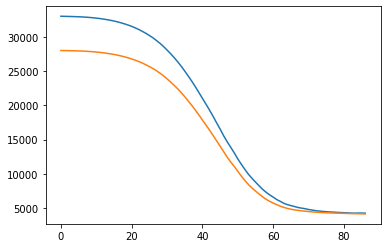

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hs.history['val_loss'])
plt.plot(hs.history['loss'])